Проект пока на стадии черновика

План дальнейшей работы

- Пора переносить в отдельный репозиторий - так можно будет описывать в ReadMe
- Блок с работой над категориями
- Вместо переобозначения чисел можно нормировать категории

- Написать функцию, которая ищет людей с определенным значением X для какой-либо шкалы - посмотреть как они отвечали на вопросы
- 

- Посчитать корреляцию прочих вопросов со столбцами о работе

- В каждом из 8 блоков вопросов есть вопрос "Что могло послужить этому причиной?":
    - Причины разных типов неврозов 
    - Причины: работа, учеба, личные
    - Связь блоков и причин, связь шкал и причин
- Для матрицы перемножений RC необходимо посчитать насколько коррелируют между собой шкалы
- Отдельный пункт о работе: 1) особо выделить группу работающих в данный момент, и среди них посмотреть тревожность, 2) а у тех, кто работал, а сейчас нет - посмотреть что было в прошлом (когда они работали и курсы, на которых проявлялись аспекты, связанные с неврозами)
- Посчитать корреляцию между вопросами, которые относятся к каждой шкале отдельно
- Длительность симптомов как критерий (сколько человек указал курсов-лет)
- Обращение к психиатру (среди последних столбцов: разбиение на две группы: возникала/не возникала необходимость, обращался/не обращался)
- Рассчитать средний коэффициент корреляции по всем вопросам. Указать ссылки на опросы
- Статистическая проверка наличия корреляции - гипотеза, статстика критерия, критерий
- Результат перемножения матриц
- Использовать некоррелирующие вопросы как аргументацию выбора вопросов для разных шкал (!!)
- Использовать данные из дополнительных столбцов (курсы), в том числе не используюется последний столбец, в котором содержатся тексты
- Рассчитаем средний коэффициент корреляции по всем вопросам
- Для работы посчитать отношение рисков (Бослаф, с. 389)
- На каких курсах хуже всего состояние студентов (учитывая текущее состояние и прошлое)?

Украшательства:
- Как меняется картина причин по курсам - визуализировать в виде гистограмм или подобного

# Неврозы студентов-медиков

**Цель**: исследовать проявления невротических расстройств студентов медицинских учреждений.

**Задачи**:
1. Провести скрининговый опрос студентов медицинских специальностей и контрольной группы студентов немедицинских специальностей. В качестве основы для опроса использовать ... 
2. Провести статистическую обработку данных.

**Входные данные**: 
1. Таблица опроса, содержащая ? записей студентов медицинских специальностей на 58 вопросов, включающих ответы «да» и «нет», «в данный период времени нет, но раньше наблюдалось. Часть ответов также содержит дополнительную расшифровку (например, указание курса, к которому относится положительный ответ).
2. Таблица опроса контрольной группы (пока отсутствует). Содержание вопросов идентично п. 1, но опрашивались студенты немедицинских специальностей.
3. Таблица предварительной оценки шкал, составленная по рекоммендательным документам.

*Примечание на полях*: отдельно стоит оговорить тот факт, что опрос проводился в интернете и добровольно. Студенты, добровольно вызвавшиеся участвовать в исследовании, могут не вполне полно отражать генеральную совокупность, так как обладают достаточным свободным временем для прохождения опроса. То есть возможно смещение при создании выборки (тип «смещение из-за волонтеров»). Так же как и в других видах подобного анкетирования, может наблюдаться информационное совмещение, желание людей казаться другими, чем они есть.

## Преобработка данных

Импортируем библиотеки и загружаем табличные данные из `csv`-файлов в датафреймы `pandas`.

In [1]:
import collections

import numpy as np      # обработка массивов
import scipy as sp
import pandas as pd     # обработка табличных данных  

# Библиотеки визуализации данных
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Сам опрос (строки - ответы, столбцы - вопросы)
Rm_raw = pd.read_csv("Rij (medical).csv", sep=';')  # студенты-медики
Rc_raw = pd.read_csv("Rij (control).csv", sep=';')  # контрольная группа (студенты других специальностей)

# Очищаем наборы данных от столбцов, не содержащих названия
Rm_raw = Rm_raw.loc[:, ~Rm_raw.columns.str.contains('^Unnamed')]
Rc_raw = Rc_raw.loc[:, ~Rc_raw.columns.str.contains('^Unnamed')]

# В опросе участвовали не только студенты, но и выпускники, которые уже закончили обучение
course_mapping = {'1 курс магистратуры': 5,
                  'Магистратура 1 курс':5,
                  'магистратура 1 курс':5,
                  'магистратура, первый курс':5,
                  '2 курс магистратуры': 6,
                  'Аспирантура':'обучение завершено'}

Rc_raw['Курс'] = Rc_raw['Курс'].replace(course_mapping)

Rm_grad = Rm_raw[Rm_raw['Курс']=='обучение завершено']
Rm_raw = Rm_raw[Rm_raw['Курс']!='обучение завершено']

Rc_grad = Rc_raw[Rc_raw['Курс']=='обучение завершено']
Rc_raw = Rc_raw[Rc_raw['Курс']!='обучение завершено']

# Преобразуем номер курса к целочисленному типу
Rm_raw['Курс'] = Rm_raw['Курс'].astype(int)
Rc_raw['Курс'] = Rc_raw['Курс'].astype(int)

# Предварительная оценка шкал (строки - вопросы, столбцы)
C_raw = pd.read_csv("Cjk.csv", sep=';', index_col=0)

Посмотрим как выглядят исходные данные, по 5 строк из каждого набора данных:

In [2]:
Rm_raw.head()

,Отметка времени,Пол,Возраст,Учебное заведение,Факультет,Курс,Совмещаете ли Вы учебу с работой?,На каких курсах Вы совмещали работу с учебой?,Возникают ли у Вас проблемы со сном?,На каких курсах у Вас возникали проблемы со сном?,...,Замечали ли Вы у себя появление проблем коммуникации с другими людьми?,Вам часто хочется побыть одному?,Вы чувствуете себя скованно или неуверенно в обществе?,"Бывает ли у Вас чувство, что к Вам относятся безразлично, никто не стремится понять и посочувствовать, ощущение одиночества?","Приходят ли Вам мысли, что подруги (друзья) или близкие более счастливы, чем Вы?","Замечаете ли, что Ваш интерес к людям ослаб?",На каких курсах вы особенно часто сталкивались с появлением проблем коммуникации с другими людьми?,Что могло послужить этому причиной?.7,"Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?","Если у Вас остались связанные с учебой переживания, неупоминаемые в данном опросе, то Вы можете описать их здесь:"
0,28.11.2019 21:27:25,женский,18.0,СПбГПМУ,педиатрический,1,нет и никогда ранее не совмещал,NaN,нет,NaN,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.11.2019 21:27:41,женский,18.0,СПбГПМУ,лечебное дело,1,нет и никогда ранее не совмещал,NaN,да,1,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28.11.2019 21:28:59,женский,18.0,СПбГПМУ,лечебное дело,1,нет и никогда ранее не совмещал,NaN,да,"1, еще до обучения",...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.11.2019 21:30:03,женский,17.0,СПбГПМУ,педиатрический,1,"да, в данный момент трудоустроен",1,нет,NaN,...,да,да,да,да,да,да,1,"взаимоотношения с одногруппниками, личные прич...",нет,NaN
4,28.11.2019 21:30:06,женский,18.0,СПбГПМУ,педиатрический,1,нет и никогда ранее не совмещал,NaN,да,"1, еще до обучения",...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Rc_raw.head()

,Отметка времени,Пол,Возраст,Учебное заведение,Факультет,Курс,Совмещаете ли Вы учебу с работой?,На каких курсах Вы совмещали работу с учебой?,Возникают ли у Вас проблемы со сном?,На каких курсах у Вас возникали проблемы со сном?,...,Замечали ли Вы у себя появление проблем коммуникации с другими людьми?,Вам часто хочется побыть одному?,Вы чувствуете себя скованно или неуверенно в обществе?,"Бывает ли у Вас чувство, что к Вам относятся безразлично, никто не стремится понять и посочувствовать, ощущение одиночества?","Приходят ли Вам мысли, что подруги (друзья) или близкие более счастливы, чем Вы?","Замечаете ли, что Ваш интерес к людям ослаб?",На каких курсах вы особенно часто сталкивались с появлением проблем коммуникации с другими людьми?,Что могло послужить этому причиной?.7,"Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?","Если у Вас остались связанные с учебой переживания, неупоминаемые в данном опросе, то Вы можете описать их здесь:"
0,25.12.2019 18:41:32,мужской,21.0,СПбГУ,"Биологии (в 2016), психологии (сейчас).",1,"да, в данный момент трудоустроен",1,да,1,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.12.2019 14:04:18,женский,18.0,СПбГУ,Восточный,1,нет и никогда ранее не совмещал,NaN,да,1,...,да,нет,да,нет,нет,да,еще до обучения,взаимоотношения с одногруппниками,нет,NaN
2,26.12.2019 20:48:52,мужской,18.0,СПБУТУиЭ,Гуманитарных и социальных наук,1,нет и никогда ранее не совмещал,NaN,нет,NaN,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.12.2019 16:58:26,женский,19.0,СПбГУ,искусств,1,нет и никогда ранее не совмещал,NaN,да,1,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.12.2019 22:08:51,женский,18.0,СПбГУ,Искусств,1,нет и никогда ранее не совмещал,NaN,нет,NaN,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
C_raw.head()

,Вопрос,Категория вопроса,Тревожные расстройства,Обсессивно-компульсивное расстройство,Соматоформные расстройства,Неврастения,Тревожно-депрессивное растройство
Номер вопроса,,,,,,,
1,Возникают ли у Вас проблемы со сном?,Проблемы со сном,1,1,1,2,1
2,Ваш сон поверхностный и неспокойный?,Проблемы со сном,1,1,1,2,0
3,После сна Вы чувствуете себя усталым и «разбит...,Проблемы со сном,0,0,0,2,1
4,Считаете ли вы достаточной продолжительность В...,Проблемы со сном,-1,-1,0,-1,-1
5,У Вас бывают кошмарные сновидения?,Проблемы со сном,1,1,1,1,0


In [5]:
q_categories = pd.unique(C_raw["Категория вопроса"])

# Причины расстройств, выбранные (и указанные) респондентами

В каждом из восьми блоков вопросов имеется вопрос «Что могло послужить этому причиной?». Респондент мог как выбрать один из предложенных пунктов, так и указать сосбтвенный ответ. Для начала определим, какие причины наиболее часто выбирались в каждом из блоков вопросов.

In [6]:
# Найдем все столбцы с вопросом о причине
reason_cols = [col for col in Rm_raw.columns if "Что могло послужить этому причиной?" in col]

# Проблема в том, что в процессе опроса причины стыкуются через запятую
# но некоторые строки причин сами содержат запятую

# Перечислим причины-опции, чтобы их найти и посчитать
reasons = ["повышенная учебная нагрузка и переутомление",
           "экзамены",
           "личные причины, не связанные с учебой",
           "совмещение учебы с работой",
           "неопределенность будущей карьеры",
           "разочарованность в будущей профессии",
           "взаимоотношения с одногруппниками",
           "взаимоотношения с преподавателями",
           "разочарованность в выборе учебного заведения",
           "взаимоотношения с коллегами",
           "причины нет"]

def preprocess_col_reasons_str(R_raw, col_num):
    col_name = "Что могло послужить этому причиной?"
    if col_num in range(1, 8):
        col_name = col_name + '.' + str(col_num)
    
    
    col_reasons_str = ", ".join(R_raw[col_name].dropna().values)
    # удалим двойные пробелы
    col_reasons_str = " ".join(col_reasons_str.split())
    
    # одна строка избыточна по отношению к имеющейся, заменим ее более короткой
    old_s = "совмещение учебы с работой (взаимоотношения с коллегами)"
    new_s = "взаимоотношения с коллегами"
    col_reasons_str = col_reasons_str.replace(old_s, new_s)
    return col_reasons_str


def count_reasons(R_raw, col_num):
    """для того, чтобы посчитать количество вхождения строк
    соберем все непустые строки в одну и посчитаем вхождение каждой строки,
    а чтобы остались специфичные ответы, будем удалять посчитанные строки"""
    col_reasons_str = preprocess_col_reasons_str(R_raw, col_num)
    specific_reasons = []   # специфичные причины, описанные респондентами
    reason_cnt = collections.Counter()  # счетчик причин
    
    start_indices = [col_reasons_str.find(reason) for reason in reasons]
    
    while True:
        # найдем индексы вхождения строки каждой причины в общую строку
        start_indices = [col_reasons_str.find(reason) for reason in reasons]
        if start_indices.count(start_indices[0]) == len(start_indices):
            break

        # причина из списка может не упоминаться, тогда find возвращает -1
        # определим номер минимального индекса входящей причины
        current_start_indices = [i for i in start_indices if i >= 0]
        start = min(current_start_indices)
        reason_ind = start_indices.index(start)

        # найдем стартовый и конечный индексы символов для вырезания из строки
        reason = reasons[reason_ind]
        start = start_indices[reason_ind]
        end = start_indices[reason_ind] + len(reasons[reason_ind]) + len(", ")

        # считаем причину
        reason_cnt[reason] += 1

        # удаляем подстроку причины из общей строки
        if start != 0:
            specific_reasons.append(col_reasons_str[:start-len(", ")])
        
        col_reasons_str = col_reasons_str[end:]

    return reason_cnt, specific_reasons

def print_col_reasons(R_raw, col_num):
    print("Причины для группы вопросов «{}»".format(q_categories[col_num]))
    reason_cnt, specific_reasons = count_reasons(R_raw, col_num)
    print("Частота указания причин, выбранных респондентами из списка причин: ")
    for key, value in reason_cnt.most_common():
        print("- {}: {}".format(key, value))
    print("Специфичные причины, указанные респондентами: ")
    for item in specific_reasons:
        print("- «{}»".format(item))
    print("-"*100)

print("Причины в опросе студентов-медиков".upper())
for col_num in range(7):
    print_col_reasons(Rm_raw, col_num)

print("="*100)
    
print("Причины в опросе контрольной группы".upper())
for col_num in range(7):
    print_col_reasons(Rc_raw, col_num)

ПРИЧИНЫ В ОПРОСЕ СТУДЕНТОВ-МЕДИКОВ
Причины для группы вопросов «Проблемы со сном»
Частота указания причин, выбранных респондентами из списка причин: 
- повышенная учебная нагрузка и переутомление: 214
- личные причины, не связанные с учебой: 169
- экзамены: 156
- неопределенность будущей карьеры: 104
- разочарованность в будущей профессии: 75
- совмещение учебы с работой: 74
- разочарованность в выборе учебного заведения: 55
- взаимоотношения с одногруппниками: 28
- взаимоотношения с преподавателями: 26
- причины нет: 6
Специфичные причины, указанные респондентами: 
- «Неумение время от времени правильно распределить свое время»
- «Конфликты с начальством, подставы от коллеги.»
- «Личная жизнь»
- «отстуствие понимания, ято я вообще делаю и как это пригодится»
- «в общаге шумно»
- «И это был другой ВУЗ»
- «Некогда спать»
- «Переживания от накопленных отработок, что не успею сдать и вызовут на ректорат опять))»
- «Работа в ночь, особенно, когда на следующее утро на учебу»
- «Психотравмир

In [7]:
def print_total_reasons(Rm_raw, Rc_raw):
    print("Суммарные частоты указания причин, выбранных студентами-медиками из списка причин".upper())
    m_total_cnt = collections.Counter()
    for col_num in range(7):
        reason_cnt = count_reasons(Rm_raw, col_num)[0]
        m_total_cnt += reason_cnt

    for key, value in m_total_cnt.most_common():
        print("- {}: {:.2f}".format(key, float(value)/sum(m_total_cnt.values())))

    print("-"*100)

    print("Суммарные частоты указания причин, выбранных студентами контрольной группы из списка причин".upper())
    c_total_cnt = collections.Counter()
    for col_num in range(7):
        reason_cnt = count_reasons(Rc_raw, col_num)[0]
        c_total_cnt += reason_cnt
    for key, value in c_total_cnt.most_common():
        print("- {}: {:.2f}".format(key, float(value)/sum(c_total_cnt.values())))
        
print_total_reasons(Rm_raw, Rc_raw)

СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН, ВЫБРАННЫХ СТУДЕНТАМИ-МЕДИКАМИ ИЗ СПИСКА ПРИЧИН
- повышенная учебная нагрузка и переутомление: 0.25
- личные причины, не связанные с учебой: 0.20
- экзамены: 0.16
- неопределенность будущей карьеры: 0.10
- совмещение учебы с работой: 0.08
- разочарованность в будущей профессии: 0.07
- разочарованность в выборе учебного заведения: 0.05
- взаимоотношения с преподавателями: 0.04
- взаимоотношения с одногруппниками: 0.04
- причины нет: 0.02
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН, ВЫБРАННЫХ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ ИЗ СПИСКА ПРИЧИН
- повышенная учебная нагрузка и переутомление: 0.24
- личные причины, не связанные с учебой: 0.22
- экзамены: 0.19
- неопределенность будущей карьеры: 0.10
- разочарованность в будущей профессии: 0.06
- разочарованность в выборе учебного заведения: 0.05
- взаимоотношения с преподавателями: 0.04
- взаимоотношения с одногруппниками:

При сравнении с контрольной группой обращает внимание, что студенты-медики примерно в 2 раза чаще указывают в качестве причин совмещение учебы с работой. При этом все прочие элементы идут в том же порядке, что и остальные.

# Влияние номера курса
Очевидно, что студенты первых курсов испытывают большие трудности с обучением, чем с работой, а для старших курсов стоит выяснить этот вопрос отдельно.

In [8]:
# выделим студентов первых трех и последних трех курсов
Rm_raw_young = Rm_raw[Rm_raw['Курс'] <= 3]
Rm_raw_old = Rm_raw[Rm_raw['Курс'] > 3]
Rc_raw_young = Rc_raw[Rc_raw['Курс'] <= 3]
Rc_raw_old = Rc_raw[Rc_raw['Курс'] > 3]

print('Студенты первых трех курсов:')
print_total_reasons(Rm_raw_young, Rc_raw_young)

Студенты первых трех курсов:
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН, ВЫБРАННЫХ СТУДЕНТАМИ-МЕДИКАМИ ИЗ СПИСКА ПРИЧИН
- повышенная учебная нагрузка и переутомление: 0.29
- личные причины, не связанные с учебой: 0.21
- экзамены: 0.18
- неопределенность будущей карьеры: 0.07
- разочарованность в будущей профессии: 0.05
- взаимоотношения с одногруппниками: 0.05
- взаимоотношения с преподавателями: 0.05
- разочарованность в выборе учебного заведения: 0.05
- совмещение учебы с работой: 0.02
- причины нет: 0.02
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН, ВЫБРАННЫХ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ ИЗ СПИСКА ПРИЧИН
- повышенная учебная нагрузка и переутомление: 0.24
- личные причины, не связанные с учебой: 0.22
- экзамены: 0.20
- неопределенность будущей карьеры: 0.10
- разочарованность в будущей профессии: 0.06
- разочарованность в выборе учебного заведения: 0.06
- взаимоотношения с преподавателями: 0.05
- взаим

In [9]:
print('Студенты последних трех курсов:')
print_total_reasons(Rm_raw_old, Rc_raw_old)

Студенты последних трех курсов:
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН, ВЫБРАННЫХ СТУДЕНТАМИ-МЕДИКАМИ ИЗ СПИСКА ПРИЧИН
- повышенная учебная нагрузка и переутомление: 0.22
- личные причины, не связанные с учебой: 0.19
- экзамены: 0.15
- совмещение учебы с работой: 0.11
- неопределенность будущей карьеры: 0.11
- разочарованность в будущей профессии: 0.07
- разочарованность в выборе учебного заведения: 0.05
- взаимоотношения с преподавателями: 0.04
- взаимоотношения с одногруппниками: 0.03
- причины нет: 0.02
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН, ВЫБРАННЫХ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ ИЗ СПИСКА ПРИЧИН
- повышенная учебная нагрузка и переутомление: 0.25
- личные причины, не связанные с учебой: 0.24
- экзамены: 0.17
- неопределенность будущей карьеры: 0.10
- совмещение учебы с работой: 0.07
- разочарованность в будущей профессии: 0.04
- взаимоотношения с одногруппниками: 0.04
- взаимоотношения с пр

# Поиск матричных элементов 

Не все пункты опроса из таблиц `R` присутствуют в таблице шкал `С`. Создадим специальные датасеты для матричных операций:

In [10]:
qs_yn = C_raw['Вопрос']   # список вопросов таблицы C
Rm_yn = Rm_raw[qs_yn]     # таблица ответов студентов-медиков, содержащая те же вопросы, что таблица C
Rc_yn = Rc_raw[qs_yn]     # таблица ответов контрольной-группы, содержащая те же вопросы, что таблица C

Приведем таблицы к виду числовых матриц. Таблицы опроса будут обозначаться $R$ для студентов-медиков и $R'$ для контрольной группы. Ответу $i$-го респондента на $j$-й вопрос соответствует элемент $R_{ij}$. Таблица шкал образует матрицу $C$, в которой $j$-му вопросу в $k$-ой шкале соответствует оценка $C_{jk}$. Количество ненулевых оценок $k$-й шкалы обозначим $m_k$.

Для того, чтобы привести таблицы к виду числовых матриц, произведем замену строковых значений на числа:
- $1$ – «да»,
- $0.5$ – ответы, начинающиеся с «в данный период времени нет, но раньше...»,
- $-1$ – «нет».

Предварительные оценки в матрице $С$ даны в виде рангов:
- $1$ — вопрос играет существенную роль для данного типа невротического расстройства,
- $0.5$ — вопрос имеет значение для данного типа невротического расстройства, но меньшее,
- $0$ — не имеется сведений, чтобы вопрос имел значение для данного типа расстройства.

Для того, чтобы охарактеризовать $i$-го респондента по шкале $k$, сопоставим некоторый численный показатель $X_{ik}$, который можно вычислить через перемножение матриц $R$ и $C$:

$$X_{ik} = \frac{1}{m_k} \sum_{j=1}^n{R_{ij}C_{jk}}$$

Нормирующий коэффициент $m_k$ учитывает, что число оценок в шкалах различно.

In [22]:
# Определим количество ненулевых значений в каждой из шкал
# учтем, что два первых столбца - вопрос и категория вопроса
m_k = np.count_nonzero(C_raw, axis=0)[2:]  

# Сопоставим числа значениям таблиц опроса
R_mapping = {'да': 1, 'нет': -1, '':0, None:0,
           'в данный период времени нет, но раньше наблюдалось подобное':0.5,
           'в данный период времени нет, но раньше был таким':0.5,
           'в данный период времени нет, но раньше сталкивался с подобным':0.5,
           'в данный период времени нет, но раньше бывали':0.5}

Rm_num = Rm_yn.replace(R_mapping)
Rc_num = Rc_yn.replace(R_mapping)

# Таблица С уже почти соответствует матрице, за исключением первых двух столбцов
C_mapping = {-1:-1, 0:0, 1:0.5, 2:1}  # переобозначение чисел таблицы С
C_num = C_raw[C_raw.columns[2:]].replace(C_mapping)

# Перемножим матрицы
Xm = Rm_num.dot(C_num.values)/m_k   # студенты-медики
Xc = Rc_num.dot(C_num.values)/m_k   # контрольная группа

# Распределения параметра $X$ для разных шкал

Построим распределения параметра для разных шкал.

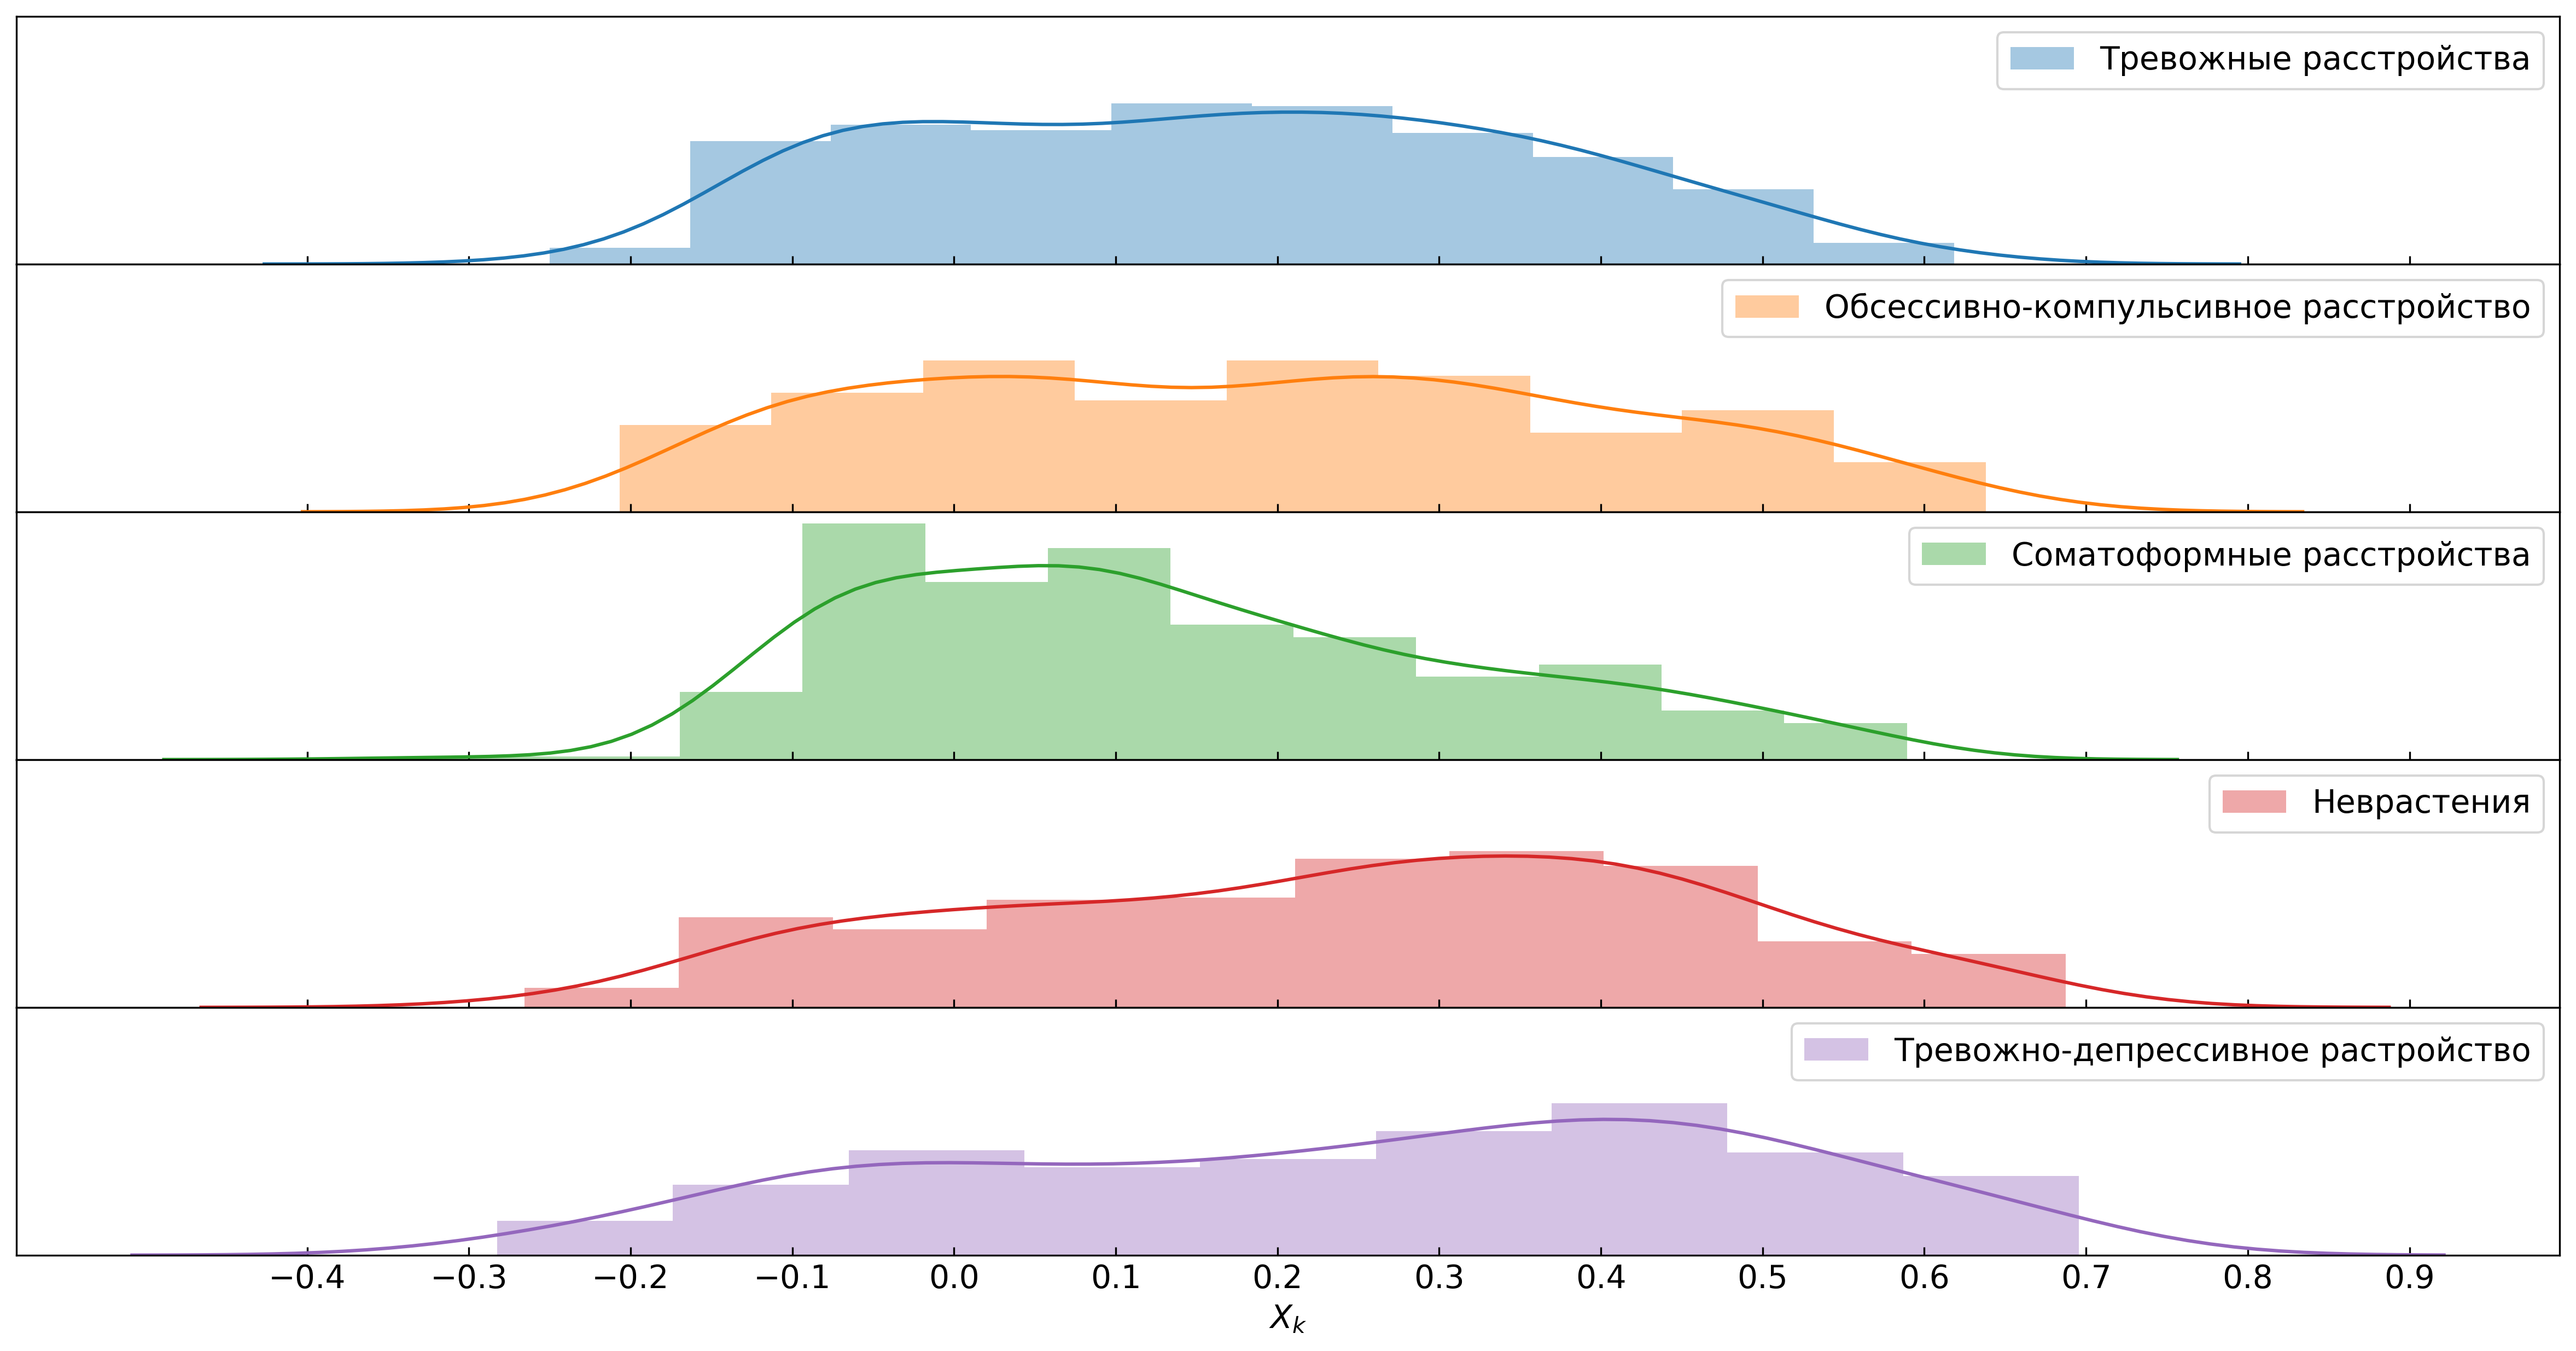

In [12]:
matplotlib.rcParams.update({'font.size': 14})

def plot_X(X):
    fig, axs = plt.subplots(C_num.shape[1], sharex=True, sharey = True, figsize=(20, 10), dpi=300, gridspec_kw={'hspace': 0})
    palette = sns.color_palette()

    for i in range(len(C_num.columns)):
        #axs[i].grid(True)
        sns.distplot(X.values[:, i], ax=axs[i], label = C_num.columns[i], color=palette[i])
        axs[i].legend(loc='upper right')
        axs[i].set_yticks([])
        axs[i].tick_params(direction='in')
        axs[i].set_xticks(np.arange(start=-0.4, step=0.1, stop=1.0))


    axs[i].xaxis.set_ticks_position('bottom')
    plt.setp(axs[i].get_xticklabels(), visible=True)
    axs[i].set_xlabel('$X_k$')
    
plot_X(Xm)

Сравним распределения с контрольной группой студентов:

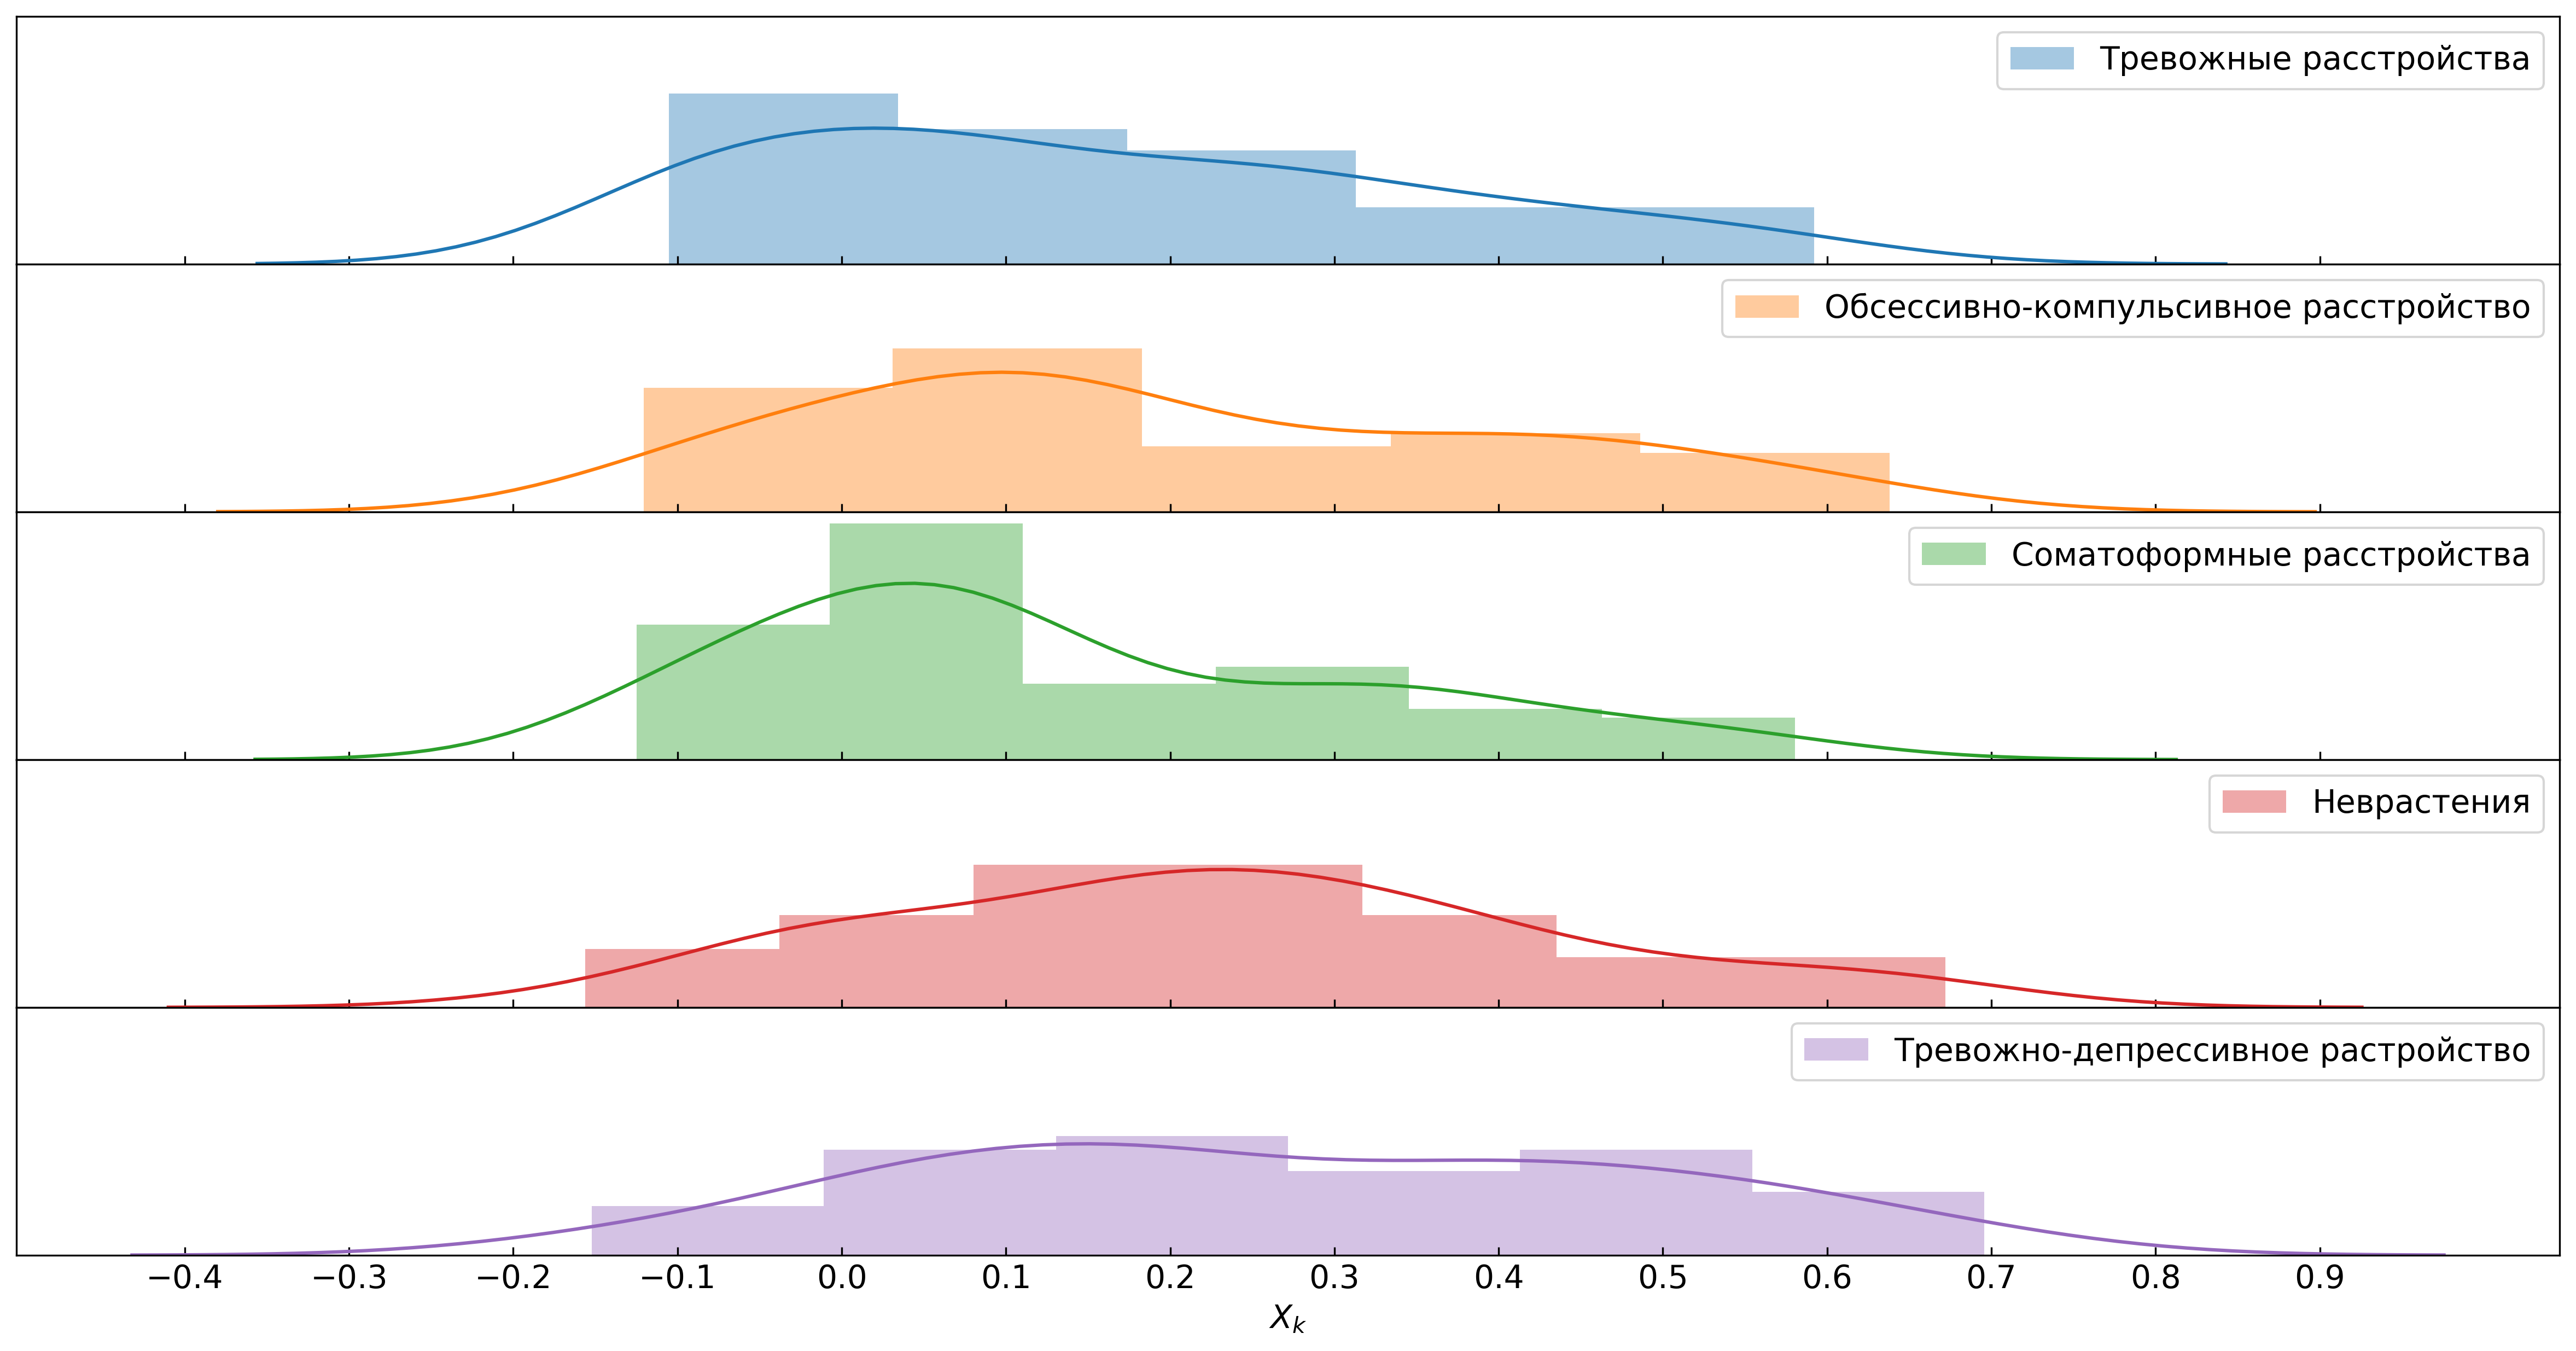

In [13]:
plot_X(Xc)

Можно видеть, что в сравнении с контрольной группы, максимумы распределений X сдвинуты в сторону больших значений (кроме соматоформных расстройств).

# Категориальная оценка респондентов по критическим вопросам

Возьмем в каждой шкале $C_k$ *критические* вопросы, для которых $С_{j} = 2$. Подсчитываем по $k$-й шкале для критических вопросов минимальное значение $X_k^{кр}$, как если бы респондент положительно отвечал лишь на эти вопросы:

$$X_k^{кр} = \frac{1}{m_k} \sum_{R_{j}=1, С_{j} = 2}{R_{j}C_{j}}.$$

Если для шкалы $k$ выполняется условие $X_{ik} > X_k^{кр}$ и респондент ответил положительно на все критические вопросы, считаем, что есть подозрение на данный тип невроза. Если баллы получаются по нескольким шкалам, то у респондента неопределенное невротическое расстройство.

In [26]:
C_num.shape

(58, 5)

In [24]:
# Для того, чтобы реализовать нахождение критических значений
# достаточно обнулить все значения в C_num, кроме максимальных

# C_cr = С_num                       # 58*5
# R_cr = np.ones   ()                # 1*58 - все единицы
# Xсr = R_cr.dot(C_cr.values)/m_k

# Оценка корреляции между вопросами

Чтобы охарактеризовать зависимость между различными пунктами опроса оценим корреляцию вопросов посредством [линейного коэффициента корреляции Пирсона](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0) $r$:

$$r_{xy} = \dfrac{\sum^m_{i=1}{(x_i-\overline{x})(y_i-\overline{y})}}{\sqrt{\sum^m_{i=1}{(x_i-\overline{x})^2}\sum^m_{i=1}{(y_i-\overline{y})^2}}},$$

где $\overline{x}, \overline{y}$ – выборочные средние для результатов опроса по вопросам $x$ и $y$ (строки матрицы $С$). Коэффициент корреляции Пирсона служит критерием «тесноты» линейно связи:
- $|r_{xy}| = 1 \Rightarrow x, y$ линейно зависимы,
- $r_{xy} = 0 \Rightarrow x, y$ линейно независимы

Изобразим распределение значений коэффициента в виде цветовой карты. Так как для диагональных элементов матрицы $r_{xy}$ имеет одинаковое максимальное значение (при $x=y$ значение $r = 1$), чтобы не терять контраст изображения и шкалы, обнулим значения отображаемой матрицы.

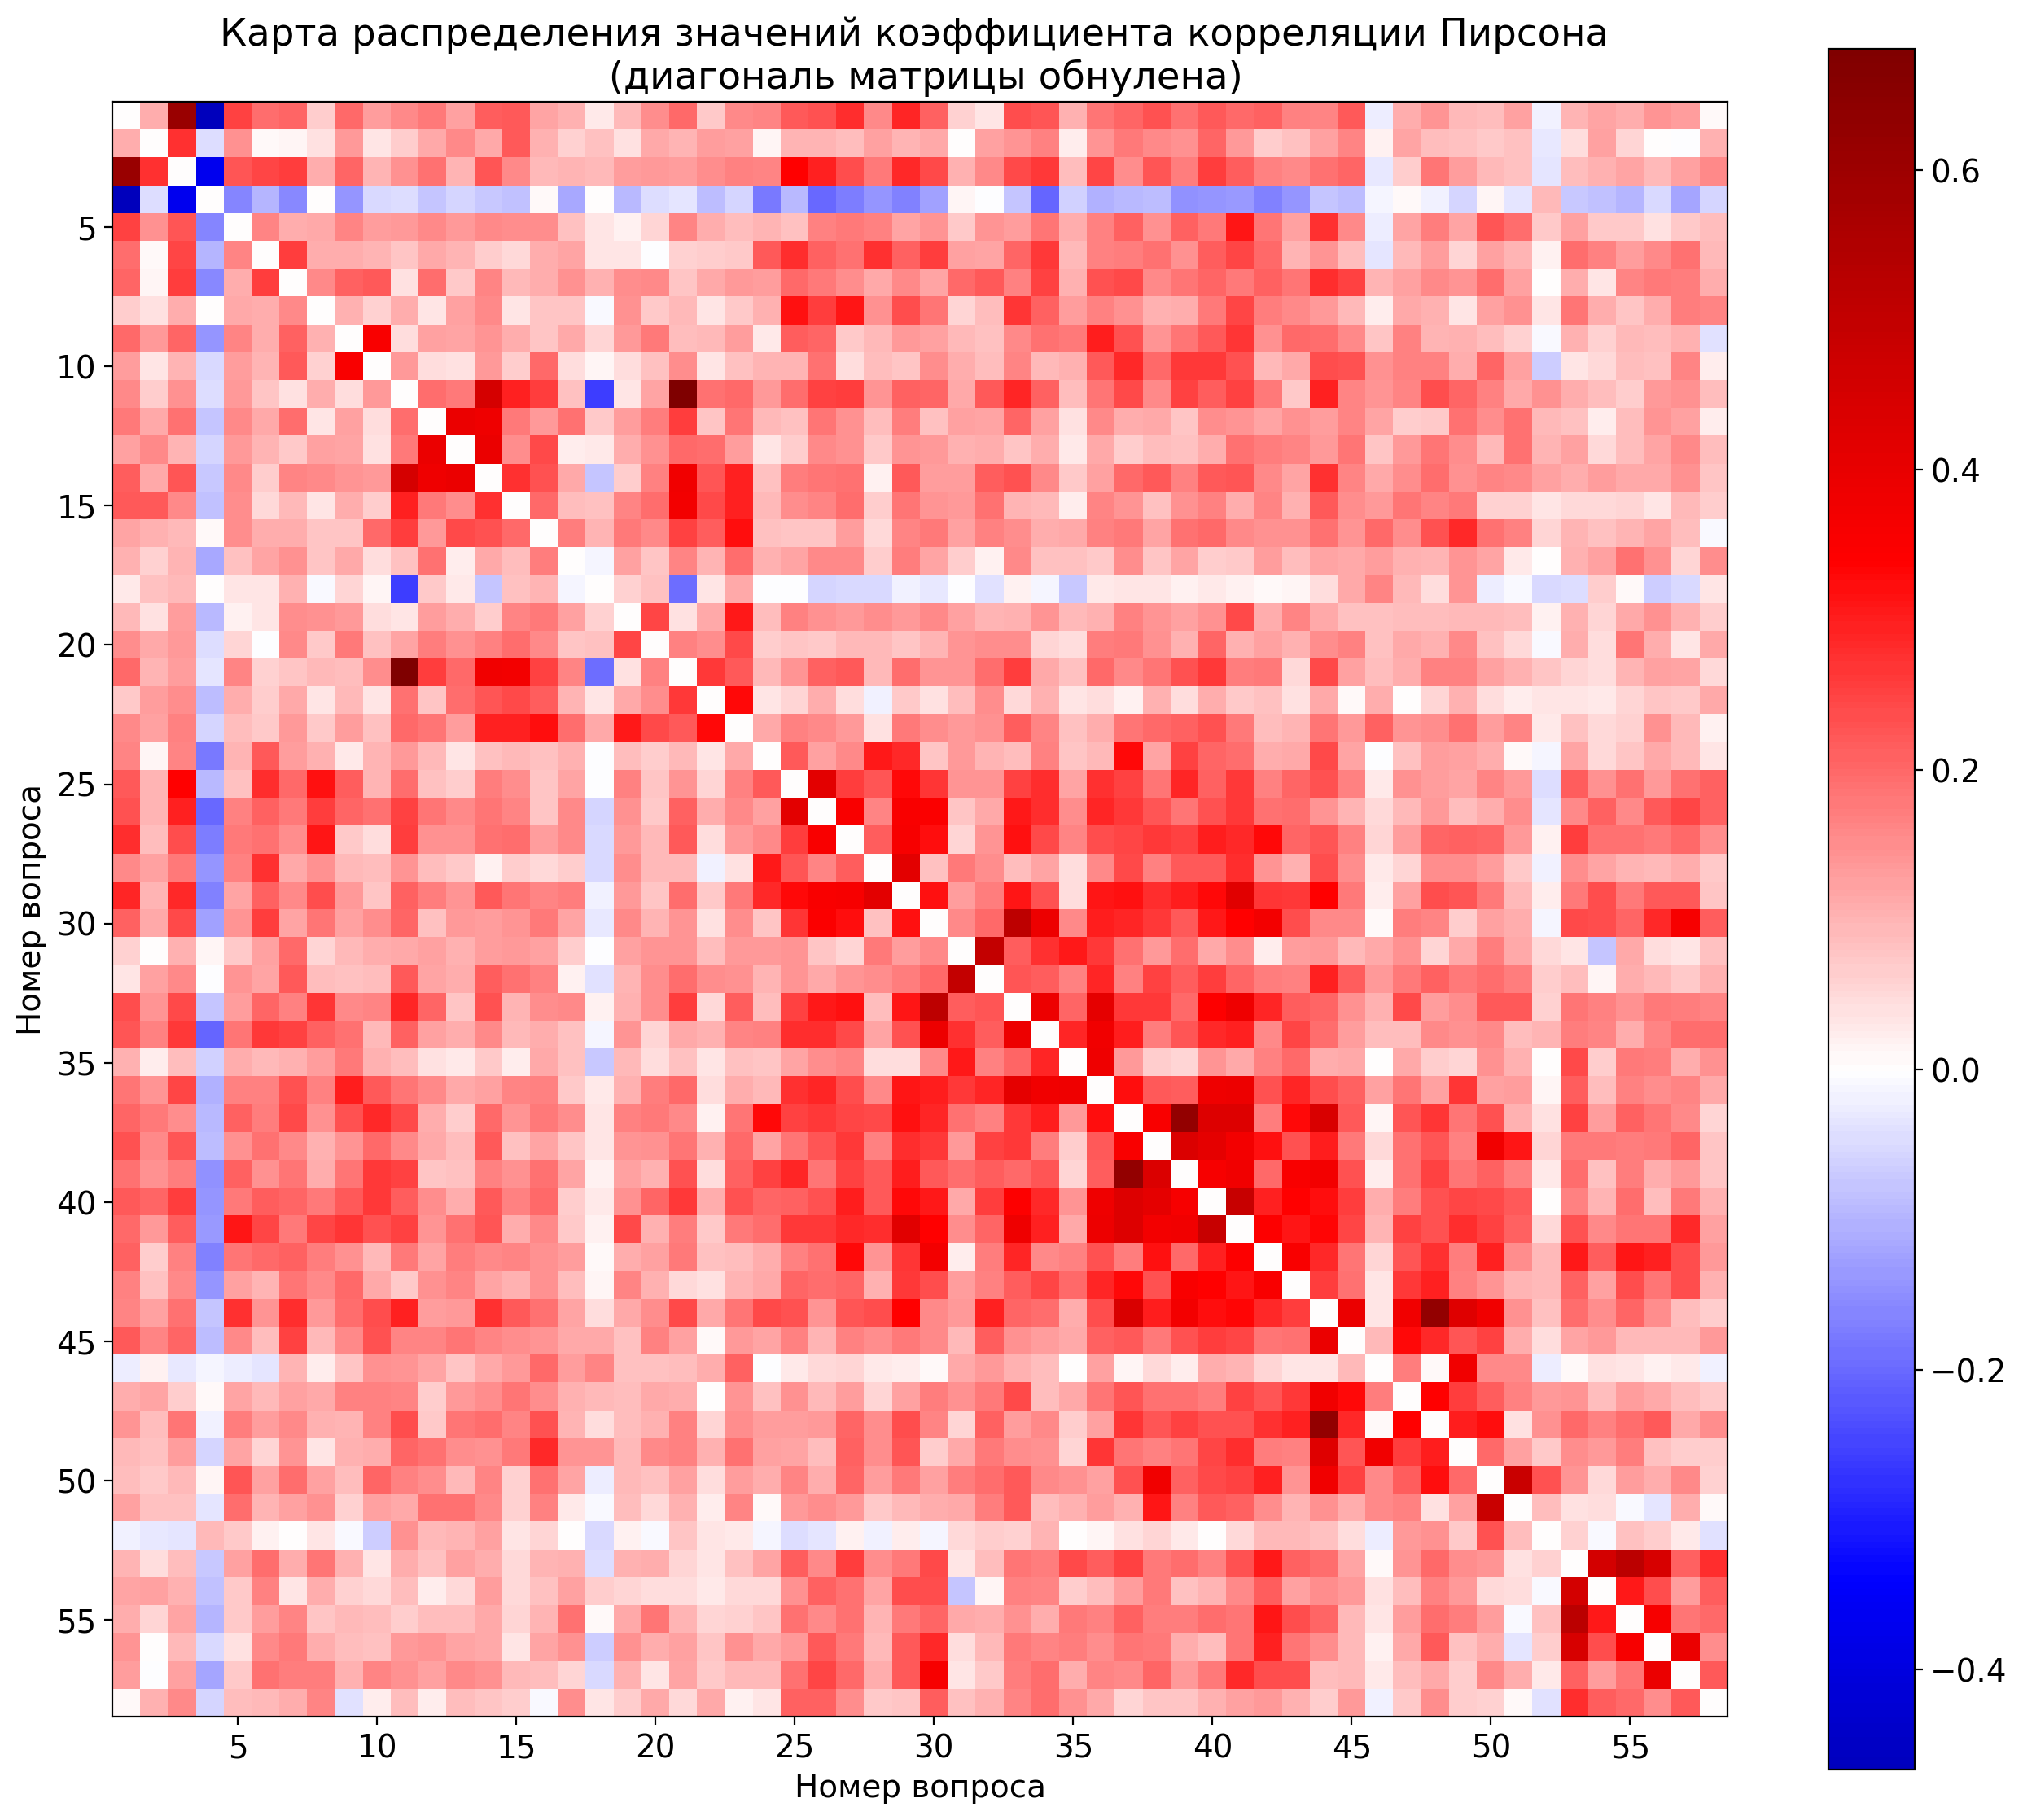

In [15]:
matplotlib.rcParams.update({'font.size': 14})

class MidpointNormalize(mpl.colors.Normalize):
    '''Класс для смещения средней точки цветной шкалы к нулю, т.е. некоррелирующим значениям'''
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return sp.ma.masked_array(sp.interp(value, x, y))
    
def correction_df_corr(df):
    df_corr = df.corr().values
    np.fill_diagonal(df_corr, 0)
    return df_corr

    
def correlation_matrix(df):
    """Функция построения матрицы корреляции"""
    df_corr = correction_df_corr(df)
    
    vmin = df_corr.min().min()
    vmax = df_corr.max().max()
    norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)
    
    fig = plt.figure(figsize=(16, 14), dpi= 200, facecolor='w', edgecolor='k')           # создаем изображение
    ax = fig.add_subplot(111)   # оно одно в общей сетке
    #ax.coords.grid(color='yellow', linestyle='solid', alpha=0.5)
    cmap = matplotlib.cm.get_cmap('seismic')    # карта цвета
    
    plt.title('Карта распределения значений коэффициента корреляции Пирсона \n (диагональ матрицы обнулена)')
    plt.xlabel('Номер вопроса')
    plt.ylabel('Номер вопроса')
    plt.xticks(range(4, 58, 5))
    ax.set_xticklabels(range(5, 59, 5))
    plt.yticks(range(4, 58, 5))
    ax.set_yticklabels(range(5, 59, 5))    
    labels = df.columns          # названия строк и стоблцов - маркеры вопросов
    plt.imshow(df_corr, cmap=cmap, norm=norm)
    plt.colorbar()

correlation_matrix(Rm_num)

Отсортируем пары вопросов по значенияю коэффициента Пирсона. Ниже представлены пары вопросом с наиболее высокими значениям $r$:

In [16]:
df_corr = correction_df_corr(Rm_num)

def sorted_indices(ary):
    """Возвращает отсортированный список пар вопросов
    с наибольшими модулями коэффициентов корреляции"""
    n = ary.size
    flat = np.abs(ary).flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    x, y = np.unravel_index(indices, ary.shape)
    return(list(zip(x[::2], y[::2])))   # каждая вторая пара


def most_corr_qs(ind, df_corr, n):
    """Печатает n вопросов с наибольшими (наименьшим) значениями коэффициентов корреляции.
    Для наименьших значений передаем отрицательное n"""
    pattern = "Вопросы {0} и {1}: «{2}» и «{3}», r = {4:.2f}."
    if n > 0:
        for (i, j) in ind[:n]:
            i, j = sorted(tuple((i, j)))
            print(pattern.format(i, j, qs_yn[i+1], qs_yn[j+1], df_corr[i, j]))
    elif n < 0:
        for (i, j) in ind[n:]:
            i, j = sorted(tuple((i, j)))
            print(pattern.format(i, j, qs_yn[i+1], qs_yn[j+1], df_corr[i, j]))
            
# отсортированные несовпадающие пары индексов
ind = [(i, j) for i, j in sorted_indices(df_corr) if i != j]
most_corr_qs(ind, df_corr, 10)

Вопросы 10 и 20: «Возникают ли у вас неприятные, болезненные или необычные физические ощущения?» и «Бывают ли у Вас головные боли?», r = 0.68.
Вопросы 36 и 38: «Замечали ли Вы у себя повышенные тревожность, беспокойство?» и «Испытываете ли Вы тревогу и беспокойство за кого-нибудь или за что-нибудь?», r = 0.63.
Вопросы 43 и 47: «Замечали ли Вы у себя появление навязчивых мыслей, действий или страхов?» и «У Вас бывают навязчивые сомнения в правильности Ваших поступков или решений?», r = 0.63.
Вопросы 0 и 2: «Возникают ли у Вас проблемы со сном?» и «После сна Вы чувствуете себя усталым и «разбитым» (неотдохнувшим)?», r = 0.61.
Вопросы 52 и 54: «Замечали ли Вы у себя появление проблем коммуникации с другими людьми?» и «Вы чувствуете себя скованно или неуверенно в обществе?», r = 0.52.
Вопросы 29 и 32: «Приходит ли Вам мысль, что в Вашей жизни мало радости и счастья?» и «"Часто я чувствую себя просто скверно"», r = 0.51.
Вопросы 30 и 31: «Легко ли меняется Ваше настроение?» и «Бывает ли Вам

Определим среднее значение модуля коэффициента корреляции между всеми парами вопросов:

$$\overline{r}_{xy} = \frac{1}{m} \sum_{x \neq y}{|r_{xy}|} $$

In [17]:
r_mean = sum([abs(df_corr[i, j]) for i, j in ind])/len(ind)   # неоптимальное решение, но массив невелик
print('Среднее значение |r| между всеми парами вопросов: {:.2f}.'.format(r_mean))

Среднее значение |r| между всеми парами вопросов: 0.15.


Адекватность теста подтверждает тот факт, что наибольшими коэффициентам корреляции обладают пары вопросов из одной группы. Однако больший интерес представляет нахождение коррелирующих пар вопросов из различных групп. Для этого произведем фильтрацию пар, оставив несмежные вопросы:

In [18]:
def ind_filtred(ind):
    """Выкидывает индексы, находящиеся в одной группе"""
    new_ind = []
    for i, j in ind:
        if C_raw['Категория вопроса'][i+1] != C_raw['Категория вопроса'][j+1]:
            new_ind.append((i, j))
    return new_ind

ind_f = ind_filtred(ind)
most_corr_qs(ind_f, df_corr, 10)

Вопросы 36 и 43: «Замечали ли Вы у себя повышенные тревожность, беспокойство?» и «Замечали ли Вы у себя появление навязчивых мыслей, действий или страхов?», r = 0.44.
Вопросы 28 и 40: «Чувствуете иногда ли Вы себя подавленным и угнетенным?» и «"У меня бывает гнетущее состояние"», r = 0.42.
Вопросы 35 и 40: «"Я довольно нервный"» и «"У меня бывает гнетущее состояние"», r = 0.39.
Вопросы 35 и 39: «"Я довольно нервный"» и «Бывает ли у Вас ощущение постоянного напряжения?», r = 0.38.
Вопросы 32 и 40: «"Часто я чувствую себя просто скверно"» и «"У меня бывает гнетущее состояние"», r = 0.38.
Вопросы 37 и 49: «Бывает ли у Вас ощущение какого-то беспокойства (как будто что-то должно случиться), хотя особых причин и нет?» и «Испытываете ли Вы иногда чувство страха даже при отсутствии реальной опасности?», r = 0.37.
Вопросы 38 и 43: «Испытываете ли Вы тревогу и беспокойство за кого-нибудь или за что-нибудь?» и «Замечали ли Вы у себя появление навязчивых мыслей, действий или страхов?», r = 0.37.


# Проверка шкал

Гипотеза: два некоррелирующих вопроса должны иметь ненулевые баллы в разных шкалах, то есть, отсутствие корреляции в матрице $R$ влечет за собой отсутствие корреляции в матрице $С$.

# Литература

1. Сара Бослаф. Статистика для всех. / Пер. с англ. П. А. Волкова, И. М. Флямер, М. В. Либерман, А. А. Галицына. – М.: ДМК Пресс, 2015.